In [6]:
# This script is developed for AAE 722 Machine Learning
# copyright: Jing Yi; jing.yi@wisc.edu

%pip install matplotlib scikit-learn seaborn statsmodels


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------------------------- ------------ 6.0/8.7 MB 30.3 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 21.2 MB/s  0:00:00
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ----------------------------- ---------- 7.1/9.6 MB 34.5 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 22.5 MB/s  0:00:00

   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   -------- ------------------------------- 1/5 [patsy]
   ---------------- --------------

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# If you previously had matplotlib.cm.register_cmap, remove or comment it out.

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_row', 10)
pd.set_option('display.width', None)

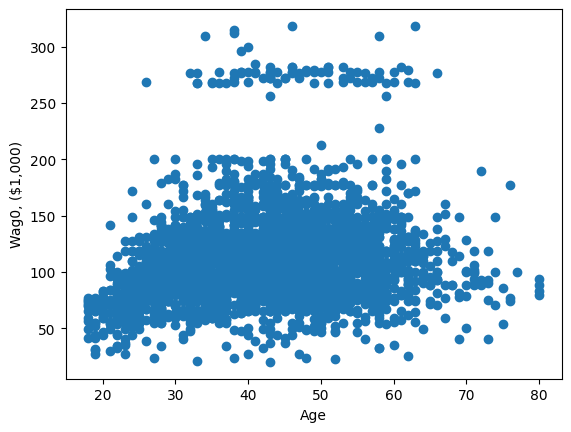

In [16]:
Dir = r'C:\Users\cvoig\OneDrive\Documents\GitHub\MachineLearning25'
df_wage = pd.read_csv(Dir + '/wage.csv')
plt.scatter(df_wage.age, df_wage.wage)
plt.xlabel('Age')  # Add x-label
plt.ylabel('Wag0, ($1,000)') 
plt.show()
# print(df_wage.head(10))
# print(df_wage.shape)

In [17]:
x = df_wage[['age']]
print('x:',x)

y = df_wage['wage']
x_with_constant = sm.add_constant(x)
print('x_with_constant',x_with_constant)
model = sm.OLS(y, x_with_constant)
results = model.fit()
print(results.summary())

x:       age
0      18
1      24
2      45
3      43
4      50
...   ...
2995   44
2996   30
2997   27
2998   27
2999   55

[3000 rows x 1 columns]
x_with_constant       const  age
0       1.0   18
1       1.0   24
2       1.0   45
3       1.0   43
4       1.0   50
...     ...  ...
2995    1.0   44
2996    1.0   30
2997    1.0   27
2998    1.0   27
2999    1.0   55

[3000 rows x 2 columns]
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     119.3
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           2.90e-27
Time:                        11:38:02   Log-Likelihood:                -15391.
No. Observations:                3000   AIC:                         3.079e+04
Df Residuals:                    2998   BIC:          

In [18]:
df_wage['age_sq'] = df_wage['age']**2
x = df_wage[['age','age_sq']]
y = df_wage['wage']
x_with_constant = sm.add_constant(x)

print(x_with_constant)
model2 = sm.OLS(y, x_with_constant)
results2 = model2.fit()
print(results2.summary())

      const  age  age_sq
0       1.0   18     324
1       1.0   24     576
2       1.0   45    2025
3       1.0   43    1849
4       1.0   50    2500
...     ...  ...     ...
2995    1.0   44    1936
2996    1.0   30     900
2997    1.0   27     729
2998    1.0   27     729
2999    1.0   55    3025

[3000 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 05 Sep 2025   Prob (F-statistic):           1.82e-56
Time:                        11:38:05   Log-Likelihood:                -15321.
No. Observations:                3000   AIC:                         3.065e+04
Df Residuals:                    2997   BIC:                         3.067e+04
Df Model:                           2      

      year  age            maritl      race        education  \
0     2006   18  1. Never Married  1. White     1. < HS Grad   
1     2004   24  1. Never Married  1. White  4. College Grad   
2     2003   45        2. Married  1. White  3. Some College   
3     2003   43        2. Married  3. Asian  4. College Grad   
4     2005   50       4. Divorced  1. White       2. HS Grad   
...    ...  ...               ...       ...              ...   
2995  2008   44        2. Married  1. White  3. Some College   
2996  2007   30        2. Married  1. White       2. HS Grad   
2997  2005   27        2. Married  2. Black     1. < HS Grad   
2998  2005   27  1. Never Married  1. White  3. Some College   
2999  2009   55      5. Separated  1. White       2. HS Grad   

                  region        jobclass          health health_ins   logwage  \
0     2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1     2. Middle Atlantic  2. Information  2. >=Very Good      2. No  

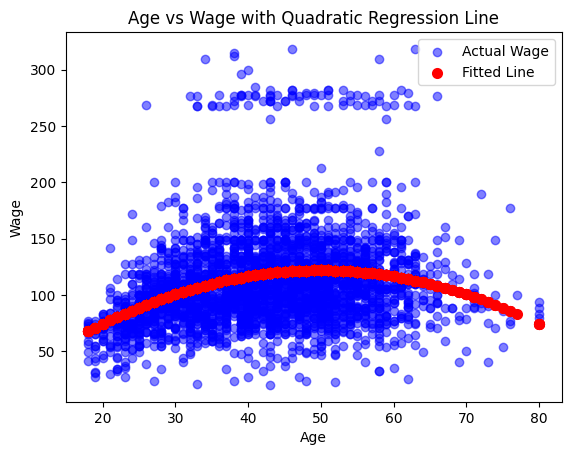

In [19]:
df_wage['predicted_wage2'] = results2.predict(x_with_constant)
print(df_wage)
plt.scatter(df_wage['age'], df_wage['wage'], color='blue', alpha=0.5, label='Actual Wage')

# Plot the fitted line
plt.scatter(df_wage['age'], df_wage['predicted_wage2'], color='red', linewidth=2, label='Fitted Line')

# Labels and title
plt.xlabel('Age')
plt.ylabel('Wage')
plt.title('Age vs Wage with Quadratic Regression Line')
plt.legend()

# Show the plot
plt.show()

In [20]:
beta_1 = results2.params['age']
beta_2 = results2.params['age_sq']

# Calculate the changing point
changing_point = -beta_1 / (2 * beta_2)
print(changing_point)

49.938903732640554
